<a href="https://colab.research.google.com/github/flinkflora17/ML_kurzus/blob/main/Hazi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aktivációs függvények

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import numpy as np

### Sigmoid

In [2]:
# 1/1+e^-z

x = [z * 0.01 for z in range(-1000, 1001)]
x = np.asarray(x)
y= []

for i in x:
  y.append(1 / (1 + math.exp(-i)))

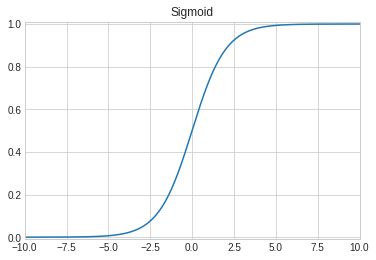

In [3]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
plt.xlim(-10, 10)
plt.ylim(-0.01, 1.01)
plt.plot(x, y, label = 'nem működik')
plt.title('Sigmoid')
plt.show()

### LeakyReLu

In [4]:
a = 0.1
x = np.linspace(-30, 30, 600)
y = [i if i>0 else a * i for i in x]

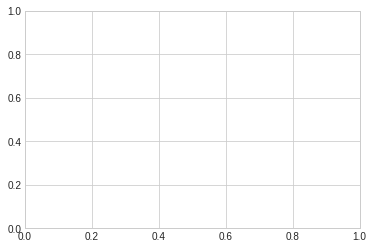

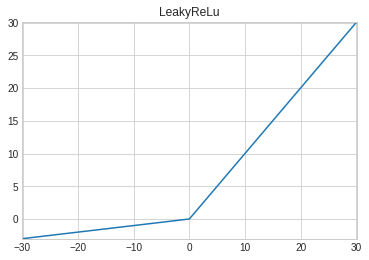

In [5]:
plt.cla()
fig, ax = plt.subplots()
plt.xlim(-30.1, 30.1)
plt.ylim(min(y)-0.1, 30.1)
plt.plot(x, y, label = 'nem működik')
plt.title('LeakyReLu')
plt.show()

## Adatbeolvasás

In [6]:
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [54]:
import io
borok = pd.read_csv(io.BytesIO(uploaded['WineQT.csv']))

In [55]:
borok.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [56]:
borok = borok.drop('Id', axis = 1)

In [57]:
borok.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
borok.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [59]:
y = borok.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [60]:
x = borok.drop('quality', axis = 1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True)

In [62]:
x_test.shape

(115, 11)

## Adatnormalizálás

In [63]:
normal = StandardScaler()

In [64]:
x_train = normal.fit_transform(x_train)
x_test = normal.transform(x_test)

## Architektúra

In [65]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.metrics import MeanSquaredError

In [66]:
input = Input(shape = (x_train.shape[1]))
x = Dense(32, activation = 'relu')(input)
x = Dense(64, activation = 'relu')(x)
output = Dense(1, activation = 'linear')(x)

In [67]:
model = keras.Model(input, output)

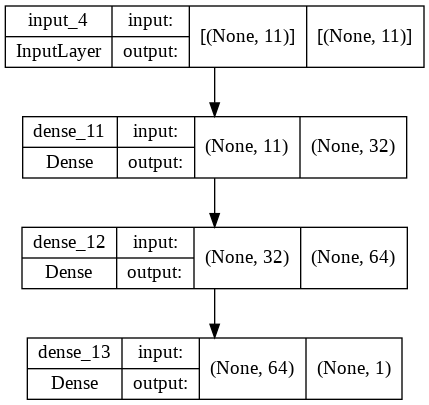

In [68]:
plot_model(model, show_shapes = True)

In [69]:
model.compile(loss = 'MSE', metrics = [MeanSquaredError()])

In [70]:
model.fit(x = x_train, y = y_train, epochs = 50)

Epoch 1/50
33/33 [==============================] - 1s 1ms/step - loss: 20.8461 - mean_squared_error: 20.8461
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 7.5096 - mean_squared_error: 7.5096
Epoch 3/50
33/33 [==============================] - 0s 1ms/step - loss: 3.4885 - mean_squared_error: 3.4885
Epoch 4/50
33/33 [==============================] - 0s 1ms/step - loss: 2.4989 - mean_squared_error: 2.4989
Epoch 5/50
33/33 [==============================] - 0s 1ms/step - loss: 1.9532 - mean_squared_error: 1.9532
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 1.5913 - mean_squared_error: 1.5913
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 1.3318 - mean_squared_error: 1.3318
Epoch 8/50
33/33 [==============================] - 0s 1ms/step - loss: 1.1344 - mean_squared_error: 1.1344
Epoch 9/50
33/33 [==============================] - 0s 2ms/step - loss: 0.9949 - mean_squared_error: 0.9949
Epoch 10/50
33/33 [=======

In [71]:
model.predict(x_test)

array([[4.948703 ],
       [5.914182 ],
       [6.915207 ],
       [5.632391 ],
       [4.931553 ],
       [5.65627  ],
       [6.6313276],
       [6.3959427],
       [6.254784 ],
       [5.2139063],
       [5.716133 ],
       [5.894781 ],
       [5.478372 ],
       [6.3821573],
       [5.3412957],
       [5.5744667],
       [4.525845 ],
       [5.0805655],
       [6.5207276],
       [5.388406 ],
       [5.853647 ],
       [5.239655 ],
       [6.509164 ],
       [6.3544016],
       [5.4467907],
       [5.6072283],
       [5.701816 ],
       [5.0195055],
       [4.921109 ],
       [6.1917963],
       [4.887911 ],
       [6.667865 ],
       [5.0988097],
       [5.45481  ],
       [5.800398 ],
       [5.0174155],
       [5.0564103],
       [5.369567 ],
       [6.0932674],
       [5.3568726],
       [5.5120134],
       [5.7545915],
       [5.314801 ],
       [5.339188 ],
       [5.399087 ],
       [6.3742595],
       [6.7638316],
       [5.3047485],
       [6.4814887],
       [4.86965  ],


In [72]:
model.evaluate(x = x_test, y = y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.3974 - mean_squared_error: 0.3974


[0.39743655920028687, 0.39743655920028687]